<a href="https://colab.research.google.com/github/bdi2357/OptimalHorizon/blob/main/MeanRevCorPairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary :
## Several models tested on RusselVsSP500
## The Benchmarks should be SP500-Russel and daily Mean-Reverting that is Long SP500 Short Russel
## Results
### Benchmarks:
#### Mean reversion: if S&P500 return is greater than Rusell1000 return -> Long Rusell short S&P500 Otherwise Long S&P500 Short Russell

#### SP500 Long Short Russel

### NGB model  
https://github.com/stanfordmlgroup/ngboost
probabilistic prediction that is predicting the probability

### Feature engineering -> basic time operators (sliding window, moments etc.), Relatoinal operators between the two elements
#### Feature engineering could be extended but due to simplicity prefernce and aviodance of implicit overfitting I prefered this simple version

### Summary of the results , there are two robust methods :
  1. mean reversion
  2. ngboost
  ngboost have smaller variance in different time horizons

|index|model\_name|out of sample length|metric|Value|
|---|---|---|---|---|
|2|ngb|250|drawdown|0\.006197082020136135|
|14|mean\_revert|250|drawdown|0\.006982713646692007|
|26|S&P500-Russell1000|250|drawdown|0\.007653461003438999|
|0|ngb|250|sharpe\_ratio|1\.9837522882920378|
|12|mean\_revert|250|sharpe\_ratio|0\.5903669707993302|
|24|S&P500-Russell1000|250|sharpe\_ratio|0\.5394473391621009|
|1|ngb|250|total\_return|0\.026369035618652448|
|13|mean\_revert|250|total\_return|0\.007864678039611994|
|25|S&P500-Russell1000|250|total\_return|0\.007227129249229747|
|5|ngb|500|drawdown|0\.010834917641408759|
|17|mean\_revert|500|drawdown|0\.01151237113891479|
|29|S&P500-Russell1000|500|drawdown|0\.007653461003438999|
|3|ngb|500|sharpe\_ratio|1\.4064919590311435|
|15|mean\_revert|500|sharpe\_ratio|0\.890016112928391|
|27|S&P500-Russell1000|500|sharpe\_ratio|1\.0444794115549663|
|4|ngb|500|total\_return|0\.03850112978241971|
|16|mean\_revert|500|total\_return|0\.024161716137272138|
|28|S&P500-Russell1000|500|total\_return|0\.028650706705671714|
|8|ngb|750|drawdown|0\.013980958995287063|
|20|mean\_revert|750|drawdown|0\.01151237113891479|
|32|S&P500-Russell1000|750|drawdown|0\.03507203586648455|
|6|ngb|750|sharpe\_ratio|1\.0706711674802019|
|18|mean\_revert|750|sharpe\_ratio|0\.9833372313242413|
|30|S&P500-Russell1000|750|sharpe\_ratio|0\.03713116437023475|
|7|ngb|750|total\_return|0\.046197015652427065|
|19|mean\_revert|750|total\_return|0\.04216668109675037|
|31|S&P500-Russell1000|750|total\_return|0\.0016059950017456304|
|11|ngb|1000|drawdown|0\.013980958995287063|
|23|mean\_revert|1000|drawdown|0\.01151237113891479|
|35|S&P500-Russell1000|1000|drawdown|0\.040804749598200796|
|9|ngb|1000|sharpe\_ratio|1\.2290467726699468|
|21|mean\_revert|1000|sharpe\_ratio|1\.6225621274481048|
|33|S&P500-Russell1000|1000|sharpe\_ratio|0\.16695962663790592|
|10|ngb|1000|total\_return|0\.07044591402948575|
|22|mean\_revert|1000|total\_return|0\.09233950323962214|
|34|S&P500-Russell1000|1000|total\_return|0\.009598994983030629|

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
L = os.listdir("/content/drive/My Drive/")
len(L)

812

In [ ]:
files = [x for x in L  if x[-6:] == "US.csv" and x[:3] in ["IVV","IWB"]]
files

['IVV_US.csv', 'IWB_US.csv']

In [ ]:
import pandas as pd
dr = "/content/drive/My Drive/"
D = {x.split("_")[0] : pd.read_csv(dr+x) for x in files }

In [ ]:
D["IVV"].head()

,Date,Open,High,Low,Close,Adjusted_close,Volume
0,2000-05-19,142.6562,142.6562,140.2500,140.6875,91.8345,775500
1,2000-05-22,140.5938,140.5938,136.8125,139.8125,91.2633,1850600
2,2000-05-23,140.2188,140.2188,137.6875,137.6875,89.8762,373900
3,2000-05-24,137.7500,140.0625,136.6562,139.7500,91.2225,400300
4,2000-05-25,140.0312,140.9375,137.8750,138.4688,90.3862,69600


In [ ]:
for k in D.keys():
  print(k)
  D[k] = D[k].sort_values(by=["Date"])

IVV
IWB


In [ ]:
D["IVV"].tail()

,Date,Open,High,Low,Close,Adjusted_close,Volume
5759,2023-04-12,413.68,413.94,409.23,409.93,409.93,3959000
5760,2023-04-13,411.04,415.62,410.50,415.27,415.27,3570000
5761,2023-04-14,414.64,416.89,411.85,414.25,414.25,3546700
5762,2023-04-17,414.14,415.85,412.88,415.78,415.78,2482500
5763,2023-04-18,417.44,417.52,414.60,416.02,416.02,2652500


In [ ]:
D["IWB"].tail()

,Date,Open,High,Low,Close,Adjusted_close,Volume
5755,2023-04-12,226.29,226.51,223.81,224.15,224.15,412600
5756,2023-04-13,224.84,227.25,224.58,227.07,227.07,590000
5757,2023-04-14,226.69,227.92,225.12,226.55,226.55,528200
5758,2023-04-17,226.41,227.33,225.73,227.25,227.25,1120000
5759,2023-04-18,228.17,228.33,226.72,227.51,227.51,537700


In [ ]:
start_dt = "2005-01-01"
def read_file(t,data_path):
    df = pd.read_csv(os.path.join(data_path,t+".csv")).set_index("Date")#["2017-01-01":]
    df = df.sort_index()
    df = df[start_dt:]
    df["CashVolume"] = df["Close"]*df["Volume"]
    df["MA_CashVolume_22"] = pd.rolling_mean(df["CashVolume"],22)
    df["MA_CashVolume_5"] = pd.rolling_mean(df["CashVolume"],5)
    df["rank CashVolume"] = df["CashVolume"].rank()
    df["rank CashVolume_22"] = df["MA_CashVolume_22"].rank()
    df["rank CashVolume_5"] = df["MA_CashVolume_5"].rank()
    df["MA_CashVolume_5_TO_MA_CashVolume_22"] = df["MA_CashVolume_5"]/df["MA_CashVolume_22"]
    return df

In [ ]:
def add_basic_cols(df):
    df = df.set_index("Date")#["2017-01-01":]

    df["CashVolume"] = df["Close"]*df["Volume"]
    df["return"] = df["Close"].pct_change()
    df["monthly_return"] = df["Close"].pct_change(22)
    df["weekly_return"] = df["Close"].pct_change(5)

    df["Mean_Close_5"] = df["Close"].rolling(5).mean()
    df["MA_CashVolume_22"] = df["CashVolume"].rolling(22).mean()
    df["MA_CashVolume_5"] = df["CashVolume"].rolling(5).mean()
    df["rank CashVolume"] = df["CashVolume"].rank()
    df["rank CashVolume_22"] = df["MA_CashVolume_22"].rank()
    df["rank CashVolume_5"] = df["MA_CashVolume_5"].rank()
    df["MA_CashVolume_5_TO_MA_CashVolume_22"] = df["MA_CashVolume_5"]/df["MA_CashVolume_22"]
    return df



In [ ]:
D2 = {x.split("_")[0] : add_basic_cols(D[x.split("_")[0]]) for x in files }

In [ ]:
D2["IVV"][-10:]

,Open,High,Low,Close,Adjusted_close,Volume,CashVolume,return,monthly_return,weekly_return,Mean_Close_5,MA_CashVolume_22,MA_CashVolume_5,rank CashVolume,rank CashVolume_22,rank CashVolume_5,MA_CashVolume_5_TO_MA_CashVolume_22
Date,,,,,,,,,,,,,,,,,
2023-04-04,413.42,413.69,409.00,410.43,410.43,3496500,1.435068e+09,-0.005115,0.010712,0.032788,408.518,2.001481e+09,1.683819e+09,4948.0,5444.0,5191.0,0.841286
2023-04-05,409.74,410.48,407.65,409.46,409.46,3698900,1.514552e+09,-0.002363,0.007183,0.015652,409.780,1.963985e+09,1.634449e+09,5042.0,5425.0,5153.0,0.832210
2023-04-06,408.57,411.27,407.44,411.01,411.01,2975500,1.222960e+09,0.003785,0.027191,0.013863,410.904,1.955258e+09,1.549345e+09,4691.0,5417.0,5084.0,0.792399
2023-04-10,408.37,411.50,407.76,411.48,411.48,2777900,1.143050e+09,0.001144,0.026570,0.000973,410.984,1.944840e+09,1.430724e+09,4580.0,5411.0,4969.0,0.735651
2023-04-11,412.02,412.97,410.69,411.47,411.47,3657000,1.504746e+09,-0.000024,0.045906,-0.002594,410.770,1.949242e+09,1.364075e+09,5034.0,5414.0,4886.0,0.699798
2023-04-12,413.68,413.94,409.23,409.93,409.93,3959000,1.622913e+09,-0.003743,0.056847,-0.001218,410.670,1.903981e+09,1.401644e+09,5132.0,5375.0,4932.0,0.736165
2023-04-13,411.04,415.62,410.50,415.27,415.27,3570000,1.482514e+09,0.013027,0.072855,0.014189,411.832,1.873208e+09,1.395237e+09,5006.0,5345.0,4924.0,0.744838
2023-04-14,414.64,416.89,411.85,414.25,414.25,3546700,1.469220e+09,-0.002456,0.052518,0.007883,412.480,1.832563e+09,1.444489e+09,4988.0,5319.0,4981.0,0.788234
2023-04-17,414.14,415.85,412.88,415.78,415.78,2482500,1.032174e+09,0.003693,0.062941,0.010450,413.340,1.740114e+09,1.422313e+09,4415.0,5233.0,4955.0,0.817368


In [ ]:
D2["IVV"].index[:5] , D2["IWB"].index[:5]

(Index(['2000-05-19', '2000-05-22', '2000-05-23', '2000-05-24', '2000-05-25'], dtype='object', name='Date'),
 Index(['2000-05-19', '2000-05-22', '2000-05-23', '2000-05-24', '2000-05-25'], dtype='object', name='Date'))

In [ ]:

# create example dataframes
#df1 = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4], 'col3': [5, 6]}, index=['row1', 'row2'])
#df2 = pd.DataFrame({'col1': [7, 8], 'col2': [9, 10], 'col3': [11, 12]}, index=['row3', 'row4'])

# concatenate dataframes
df = pd.concat(list(D2.values()), axis=1, keys= list(D2.keys()))

# rename columns
#print(df.columns)
#print(df.head())
new_cols = []
df1 = D2["IVV"]
#print(df.columns.get_level_values(0))
for i, col in enumerate(df.columns):
    key = df.columns.get_level_values(0)[i]
    #print(key)
    col_num = i % len(df1.columns) + 1
    col_name = f"{key}_col{col_num}"
    if col_num <= len(df1.columns):
        col_name = f"{key}_{df1.columns[col_num-1]}"
    else:
        col_name = f"{key}_{df1.columns[col_num-len(df1.columns)-1]}"
    new_cols.append(col_name)
df.columns = new_cols
print(df.shape,df1.shape)
# print resulting dataframe
#print(df.head())
print(df.columns)

(5764, 34) (5764, 17)
Index(['IVV_Open', 'IVV_High', 'IVV_Low', 'IVV_Close', 'IVV_Adjusted_close',
       'IVV_Volume', 'IVV_CashVolume', 'IVV_return', 'IVV_monthly_return',
       'IVV_weekly_return', 'IVV_Mean_Close_5', 'IVV_MA_CashVolume_22',
       'IVV_MA_CashVolume_5', 'IVV_rank CashVolume', 'IVV_rank CashVolume_22',
       'IVV_rank CashVolume_5', 'IVV_MA_CashVolume_5_TO_MA_CashVolume_22',
       'IWB_Open', 'IWB_High', 'IWB_Low', 'IWB_Close', 'IWB_Adjusted_close',
       'IWB_Volume', 'IWB_CashVolume', 'IWB_return', 'IWB_monthly_return',
       'IWB_weekly_return', 'IWB_Mean_Close_5', 'IWB_MA_CashVolume_22',
       'IWB_MA_CashVolume_5', 'IWB_rank CashVolume', 'IWB_rank CashVolume_22',
       'IWB_rank CashVolume_5', 'IWB_MA_CashVolume_5_TO_MA_CashVolume_22'],
      dtype='object')


In [ ]:
[c for c in df.columns if c.lower().find("return") > -1]

['IVV_return',
 'IVV_monthly_return',
 'IVV_weekly_return',
 'IWB_return',
 'IWB_monthly_return',
 'IWB_weekly_return']

In [ ]:
df["IVV_ret_GT_IWB_ret"] = (df['IVV_return'] > df['IWB_return'])
df["IVV_weekly_ret_GT_IWB_weekly_ret"] = (df['IVV_weekly_return'] > df['IWB_weekly_return'])
df["IVV_monthly_ret_GT_IWB_monthly_ret"] = (df['IVV_monthly_return'] > df['IWB_monthly_return'])
df["IVV_ret_min_IWB_ret"] = (df['IVV_return'] - df['IWB_return'])
df["IVV_weekly_ret_min_IWB_weekly_ret"] = (df['IVV_weekly_return'] - df['IWB_weekly_return'])
df["IVV_monthly_ret_min_IWB_monthly_ret"] = (df['IVV_monthly_return'] - df['IWB_monthly_return'])



In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
import numpy as np

In [ ]:
def show_nan(df):
  #print(df.tail())
  print("HERE ")
  nan_mask = df.copy().stack().isna()
  print("HERE2")
  # create new DataFrame with NaN values and their corresponding index and column labels
  print(nan_mask)
  nan_df = pd.DataFrame(np.column_stack(np.where(nan_mask)),columns=['Index', 'Column'])
  print("HERE3")
  # add values to new DataFrame
  nan_df['Value'] = np.nan
  print("HERE4")
  # set index and column labels
  nan_df = nan_df.set_index(['Index', 'Column'])

  print(nan_df)

In [ ]:
import numpy as np
def drawdown(returns):
# create a sample numpy array of prices
  #prices = (1.+returns.fillna(0.0)).cumprod()
  prices = (1.+returns).cumprod()
  # compute the logarithmic returns
  prices = np.array(prices)
  print("prices.shape ",prices.shape)
  log_returns = np.log(prices[1:]) - np.log(prices[:-1])


  # compute the cumulative returns
  cum_returns = np.cumsum(returns) #(log_returns)


  # compute the high water mark (peak value) for each day
  high_water_mark = np.maximum.accumulate(cum_returns)

  #print("high_water_mark",high_water_mark)



  # compute the drawdown as the difference between the high water mark and the cumulative returns
  drawdown = high_water_mark - cum_returns

  # compute the maximum drawdown and its duration
  max_drawdown = np.max(drawdown)
  max_drawdown_duration = np.argmax(drawdown)

  print("Maximum drawdown: {:.2%}".format(max_drawdown))
  print("Maximum drawdown duration: {} days".format(max_drawdown_duration))
  return max_drawdown

In [ ]:
def sharpe_ratio(returns_strategy):
  return returns_strategy.mean() / returns_strategy.std() * np.sqrt(252)
def total_return(returns_strategy):
  return returns_strategy.sum()


In [ ]:
metrics_dict = {
    "sharpe_ratio":sharpe_ratio,
    "total_return": total_return,
    "drawdown":drawdown

}

In [ ]:
def compuet_metrics(returns_strategy,metrics_dict):
  return {k:metrics_dict[k](returns_strategy) for k in metrics_dict.keys()}



In [ ]:
import pandas as pd
import xgboost as xgb
def mn(df):
  # Load historical closing prices for stocks A and B into a pandas DataFrame
  #print(df.head())
  #prices = df # pd.read_csv('prices.csv', index_col=0)

  # Calculate the daily returns for each stock
  #print("Check")
  #returns = prices.pct_change().fillna(0)
  #print("Check_after")
  # Create a feature DataFrame with lagged returns for both stocks
  features = df.columns
  df = df[1000:-100]
  df = df.fillna(0.0)

  # Create a binary target variable indicating whether to long A and short B (1) or short A and long B (-1)
  target = (df['IVV_return'] > df['IWB_return']).shift(-1)
  target = target.fillna(False)
  # Split the data into training and testing sets
  split = int((df.shape[0]) * 0.8)
  X_train, y_train = df[features].iloc[:split], target.iloc[:split]
  X_test, y_test = df[features].iloc[split:], target.iloc[split:]

  # Train an xgboost model to predict the target variable
  params = {
      'objective': 'binary:logistic',
      'eval_metric': 'logloss',
      'eta': 0.1,
      'max_depth': 3
  }

  #show_nan(X_test)
  #print(X_test.isna().sum().sum())

  dtrain = xgb.DMatrix(X_train, label=y_train)
  dtest = xgb.DMatrix(X_test, label=y_test)
  model = xgb.train(params, dtrain)

  # Use the trained model to predict the target variable on the testing set
  y_pred = model.predict(dtest)
  y_pred_binary = (y_pred > 0.5).astype(int) * 2 - 1

  # Calculate the returns of the trading strategy
  trades = pd.DataFrame({
      'A': df['IVV_return'].iloc[split:],
      'B': df['IWB_return'].iloc[split:],
      'target': y_pred_binary
  })
  returns_strategy = trades['A'] * trades['target'] - trades['B'] * trades['target']

  dumb_strategy_1 = trades['A'] - trades['B']
  dumb_strategy_2 = trades['B'] - trades['A']
  # Calculate some performance metrics for the trading strategy
  # sharpe_ratio = returns_strategy.mean() / returns_strategy.std() * np.sqrt(252)
  # total_return = returns_strategy.sum()
  # max_drawdown = (returns_strategy.cumsum().expanding().max() - returns_strategy.cumsum()).max()

  # print(f'Sharpe ratio: {sharpe_ratio:.2f}')
  # print(f'Total return: {total_return:.2f}')
  # print(f'Maximum drawdown: {max_drawdown:.2f}')

  metrics = compuet_metrics(returns_strategy,metrics_dict)
  print(metrics_dict.keys())
  print("XGB strategy")
  for key in metrics_dict.keys():
    print("*"*40)
    print(f' {key}: {metrics_dict[key](returns_strategy[1:-1]):.2f}')
  print(returns_strategy.shape)
  print("-"*40)
  metrics = compuet_metrics(returns_strategy,metrics_dict)
  #print(metrics_dict.keys())
  print("dumb_strategy_1")
  for key in metrics_dict.keys():
    print("*"*40)
    print(f' {key}: {metrics_dict[key](dumb_strategy_1):.2f}')
  #print(returns_strategy.shape)
  print("-"*40)
  print("dumb_strategy_2")
  for key in metrics_dict.keys():
    print("*"*40)
    print(f' {key}: {metrics_dict[key](dumb_strategy_2):.2f}')
  #print(returns_strategy.shape)
  print("-"*40)






In [ ]:
mn(df)

prices.shape  (933,)
Maximum drawdown: 57.73%
Maximum drawdown duration: 928 days
dict_keys(['sharpe_ratio', 'total_return', 'drawdown'])
XGB strategy
****************************************
 sharpe_ratio: -14.42
****************************************
 total_return: -0.58
****************************************
prices.shape  (931,)
Maximum drawdown: 57.73%
Maximum drawdown duration: 927 days
 drawdown: 0.58
(933,)
----------------------------------------
prices.shape  (933,)
Maximum drawdown: 57.73%
Maximum drawdown duration: 928 days
dumb_strategy_1
****************************************
 sharpe_ratio: 0.16
****************************************
 total_return: 0.01
****************************************
prices.shape  (933,)
Maximum drawdown: 4.08%
Maximum drawdown duration: 484 days
 drawdown: 0.04
----------------------------------------
dumb_strategy_2
****************************************
 sharpe_ratio: -0.16
****************************************
 total_return: -0.0

In [ ]:
import numpy as np
import pandas as pd
#import xgboost as xgb
from sklearn.metrics import make_scorer
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from typing import Tuple

def max_drawdown_scorer(y_true, y_pred) -> Tuple[str, float]:
    #print(y_pred.head())
    cum_returns = np.cumprod(1 + y_true * y_pred)
    cum_highwatermark = np.maximum.accumulate(cum_returns)
    drawdowns = (cum_highwatermark - cum_returns) / cum_highwatermark
    max_drawdown = np.max(drawdowns)
    #return 'max_drawdown',max_drawdown
    return max_drawdown

# Load the data
data = df.copy()
data['target'] = (df['IVV_return'] > df['IWB_return']).shift(-1).fillna(True)
data['target2'] = (df['IVV_return'] - df['IWB_return']).shift(-1).fillna(0.0)
data = data[:-500]#.fillna(0) #pd.read_csv('your_data.csv')
# Set up the features and target
X = data.drop(['target','target2'], axis=1)
y = data[['target','target2']]

# Set up the XGB model
model = xgb.XGBClassifier()

# Set up the time series split
tscv = TimeSeriesSplit(n_splits=5)

# Set up the cross-validation with max_drawdown_scorer as the scoring metric
#scores = cross_val_score(model, X, y, cv=tscv, scoring=make_scorer(max_drawdown_scorer, greater_is_better=False))

# Print the average and standard deviation of the max drawdown scores
#print(f"Average max drawdown: {np.mean(scores)}")
#print(f"Std of max drawdown: {np.std(scores)}")


In [ ]:
import numpy as np
import xgboost as xgb

# Define the custom objective function as a string
custom_objective = """
    def custom_obj(preds, dtrain):
        labels = dtrain.get_label()
        transformed_preds = np.where(preds > 0.5, 1, -1)  # Convert probabilities to binary predictions (-1 or 1)
        drawdown = np.maximum.accumulate(labels * transformed_preds) - labels * transformed_preds
        max_drawdown = np.max(drawdown)
        grad = -max_drawdown * (labels - preds)
        hess = np.ones_like(preds)
        return grad, hess
    """

data = df.copy()
data['target'] = (df['IVV_return'] - df['IWB_return']).shift(-1).fillna(0.0)
data = data[:-500]  # Assuming you want to exclude the last 500 rows
# Set up the features and target
X_train = data.drop(['target'], axis=1)
y_train = data['target']

# Create the DMatrix for training
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # We specify a regression objective since the custom objective is for gradient calculation
    'eval_metric': 'rmse',  # Use any suitable evaluation metric
    'max_depth': 3,
    'obj': custom_objective  # Specify the custom objective function
    # add more parameters as needed
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=10)


[11:58:14] WARNING: ../src/learner.cc:767: 
Parameters: { "obj" } are not used.



In [ ]:
import numpy as np
import xgboost as xgb

# Generate a sample regression dataset

# Define the quantiles you want to estimate
quantiles = [0.1, 0.5, 0.9]

# Train separate XGBoost regression models for each quantile
models = []
for q in quantiles:
    model = xgb.XGBRegressor()
    y_q = np.percentile(y_train, q * 100)
    model.fit(X_train, y_train <= y_q)
    models.append(model)

# Predict quantiles using the ensemble of models
quantile_predictions = []
for model in models:
    quantile_prediction = model.predict(X_train)
    quantile_predictions.append(quantile_prediction)

# Compute the mean prediction across quantiles
mean_prediction = np.mean(quantile_predictions, axis=0)


In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
regressor = lgb.LGBMRegressor()
regressor.fit(X_train, y_train)
regressor_pred = regressor.predict(X_train)

In [ ]:
lower = lgb.LGBMRegressor(objective = 'quantile', alpha = 1 - 0.95)
lower.fit(X_train, y_train)
lower_pred = lower.predict(X_train)

In [ ]:
upper = lgb.LGBMRegressor(objective = 'quantile', alpha = 1 - 0.05)
upper.fit(X_train, y_train)
upper_pred = upper.predict(X_train)

In [ ]:
!pip install --upgrade ngboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 39.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 5.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=3bdca7caf6bb1ce492197dc1059d4e0b8ff0c6b176c2488e727aafb1521dfd00
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=4c1049f15e448dd471fdbd5d64416afd65d1b80e1cdc29833558746804cd0e94
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
"""
from ngboost import NGBRegressor

#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X, Y = data,target#load_boston(True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

ngb = NGBRegressor().fit(X_train, Y_train)
Y_preds = ngb.predict(X_test)
Y_dists = ngb.pred_dist(X_test)

# test Mean Squared Error
test_MSE = mean_squared_error(Y_preds, Y_test)
print('Test MSE', test_MSE)

# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(Y_test).mean()
print('Test NLL', test_NLL)
"""

'\nfrom ngboost import NGBRegressor\n\n#from sklearn.datasets import load_boston\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\ndata_url = "http://lib.stat.cmu.edu/datasets/boston"\nraw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)\ndata = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])\ntarget = raw_df.values[1::2, 2]\nX, Y = data,target#load_boston(True)\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)\n\nngb = NGBRegressor().fit(X_train, Y_train)\nY_preds = ngb.predict(X_test)\nY_dists = ngb.pred_dist(X_test)\n\n# test Mean Squared Error\ntest_MSE = mean_squared_error(Y_preds, Y_test)\nprint(\'Test MSE\', test_MSE)\n\n# test Negative Log Likelihood\ntest_NLL = -Y_dists.logpdf(Y_test).mean()\nprint(\'Test NLL\', test_NLL)\n'

In [ ]:
%%time
from ngboost import NGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def ngb_train(df,oss):
  target = (df['IVV_return'] - df['IWB_return']).shift(-1).fillna(0.0)
  X_train = df[:-oos]
  target_train = target[:-oos]
  X_test = df[-oos:]
  target_test = target[-oos:]
  ngb = NGBRegressor().fit(X_train.fillna(0.0), target_train)
  Y_preds = ngb.predict(X_test.fillna(0.0))
  Y_dists = ngb.pred_dist(X_test.fillna(0.0))

  # test Mean Squared Error
  test_MSE = mean_squared_error(Y_preds, target_test)
  print('Test MSE', test_MSE)

  # test Negative Log Likelihood
  test_NLL = -Y_dists.logpdf(target_test).mean()
  print('Test NLL', test_NLL)
  return ngb,X_train,target_train,X_test,target_test,Y_preds,Y_dists

CPU times: user 56.5 ms, sys: 16 ms, total: 72.5 ms
Wall time: 242 ms


In [ ]:
df.head()

,IVV_Open,IVV_High,IVV_Low,IVV_Close,IVV_Adjusted_close,IVV_Volume,IVV_CashVolume,IVV_return,IVV_monthly_return,IVV_weekly_return,...,IWB_rank CashVolume,IWB_rank CashVolume_22,IWB_rank CashVolume_5,IWB_MA_CashVolume_5_TO_MA_CashVolume_22,IVV_ret_GT_IWB_ret,IVV_weekly_ret_GT_IWB_weekly_ret,IVV_monthly_ret_GT_IWB_monthly_ret,IVV_ret_min_IWB_ret,IVV_weekly_ret_min_IWB_weekly_ret,IVV_monthly_ret_min_IWB_monthly_ret
Date,,,,,,,,,,,,,,,,,,,,,
2000-05-19,142.6562,142.6562,140.2500,140.6875,91.8345,775500,1.091032e+08,NaN,NaN,NaN,...,136.0,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
2000-05-22,140.5938,140.5938,136.8125,139.8125,91.2633,1850600,2.587370e+08,-0.006219,NaN,NaN,...,2526.0,NaN,NaN,NaN,False,False,False,-0.003276,NaN,NaN
2000-05-23,140.2188,140.2188,137.6875,137.6875,89.8762,373900,5.148136e+07,-0.015199,NaN,NaN,...,1586.0,NaN,NaN,NaN,True,False,False,0.001672,NaN,NaN
2000-05-24,137.7500,140.0625,136.6562,139.7500,91.2225,400300,5.594192e+07,0.014980,NaN,NaN,...,249.0,NaN,NaN,NaN,True,False,False,0.006400,NaN,NaN
2000-05-25,140.0312,140.9375,137.8750,138.4688,90.3862,69600,9.637428e+06,-0.009168,NaN,NaN,...,49.0,NaN,1390.0,NaN,False,False,False,-0.001724,NaN,NaN


In [ ]:
%%time
oos = 250
model_ngb,X_train,target_train,X_test,target_test,Y_preds,Y_dists = ngb_train(df,oos)

[iter 0] loss=-4.7378 val_loss=0.0000 scale=1.0000 norm=0.7257
[iter 100] loss=-5.2596 val_loss=0.0000 scale=2.0000 norm=0.9526
[iter 200] loss=-5.3834 val_loss=0.0000 scale=1.0000 norm=0.4873
[iter 300] loss=-5.4282 val_loss=0.0000 scale=1.0000 norm=0.4934
[iter 400] loss=-5.4583 val_loss=0.0000 scale=1.0000 norm=0.4933
Test MSE 7.148153488235229e-07
Test NLL -5.670368272587675
CPU times: user 1min 8s, sys: 60.6 ms, total: 1min 8s
Wall time: 1min 16s


In [ ]:
start_date = "2015-01-01"
df = df.sort_index()
df = df[start_date:]
df.tail()

,IVV_Open,IVV_High,IVV_Low,IVV_Close,IVV_Adjusted_close,IVV_Volume,IVV_CashVolume,IVV_return,IVV_monthly_return,IVV_weekly_return,...,IWB_rank CashVolume,IWB_rank CashVolume_22,IWB_rank CashVolume_5,IWB_MA_CashVolume_5_TO_MA_CashVolume_22,IVV_ret_GT_IWB_ret,IVV_weekly_ret_GT_IWB_weekly_ret,IVV_monthly_ret_GT_IWB_monthly_ret,IVV_ret_min_IWB_ret,IVV_weekly_ret_min_IWB_weekly_ret,IVV_monthly_ret_min_IWB_monthly_ret
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-12,413.68,413.94,409.23,409.93,409.93,3959000,1.622913e+09,-0.003743,0.056847,-0.001218,...,3437.0,4650.0,3220.0,0.577642,True,True,True,2.564326e-04,0.000252,0.002619
2023-04-13,411.04,415.62,410.50,415.27,415.27,3570000,1.482514e+09,0.013027,0.072855,0.014189,...,4214.0,4642.0,3212.0,0.578227,False,False,True,-3.765543e-07,-0.000422,0.002174
2023-04-14,414.64,416.89,411.85,414.25,414.25,3546700,1.469220e+09,-0.002456,0.052518,0.007883,...,3954.0,4409.0,3362.0,0.664636,False,False,True,-1.661906e-04,-0.000799,0.001534
2023-04-17,414.14,415.85,412.88,415.78,415.78,2482500,1.032174e+09,0.003693,0.062941,0.010450,...,5246.0,4470.0,4015.0,0.838119,True,True,True,6.035962e-04,0.000136,0.001769
2023-04-18,417.44,417.52,414.60,416.02,416.02,2652500,1.103493e+09,0.000577,0.045565,0.011058,...,3997.0,4339.0,4245.0,0.961054,False,True,True,-5.668861e-04,0.000127,0.001223


In [ ]:
df.head()

,IVV_Open,IVV_High,IVV_Low,IVV_Close,IVV_Adjusted_close,IVV_Volume,IVV_CashVolume,IVV_return,IVV_monthly_return,IVV_weekly_return,...,IWB_rank CashVolume,IWB_rank CashVolume_22,IWB_rank CashVolume_5,IWB_MA_CashVolume_5_TO_MA_CashVolume_22,IVV_ret_GT_IWB_ret,IVV_weekly_ret_GT_IWB_weekly_ret,IVV_monthly_ret_GT_IWB_monthly_ret,IVV_ret_min_IWB_ret,IVV_weekly_ret_min_IWB_weekly_ret,IVV_monthly_ret_min_IWB_monthly_ret
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,207.84,208.3200,205.64,206.73,176.8022,3400917,7.030716e+08,-0.000677,-0.002172,-0.012232,...,3580.0,4253.0,4960.0,1.336224,True,False,False,0.000021,-0.001096,-0.001387
2015-01-05,205.62,205.7900,202.76,203.10,173.6977,9582604,1.946227e+09,-0.017559,-0.025806,-0.032166,...,3472.0,4284.0,4060.0,0.907756,False,False,False,-0.000711,-0.001691,-0.002477
2015-01-06,203.51,204.1200,200.25,201.27,172.1327,8019869,1.614159e+09,-0.009010,-0.038366,-0.042529,...,4032.0,4344.0,3071.0,0.596894,True,False,False,0.000846,-0.000683,-0.001153
2015-01-07,202.84,204.1400,202.30,203.76,174.2622,3563302,7.260584e+08,0.012371,-0.025305,-0.025118,...,3934.0,4395.0,3356.0,0.666860,False,True,False,-0.000004,0.000095,-0.000934
2015-01-08,205.45,207.5899,205.43,207.40,177.3752,4683157,9.712868e+08,0.017864,-0.009740,0.002562,...,3528.0,4440.0,3457.0,0.684418,True,True,False,0.000059,0.000207,-0.001027


In [ ]:
dfN = df[start_date:]

In [ ]:
dfN.head()

,IVV_Open,IVV_High,IVV_Low,IVV_Close,IVV_Adjusted_close,IVV_Volume,IVV_CashVolume,IVV_return,IVV_monthly_return,IVV_weekly_return,...,IWB_rank CashVolume,IWB_rank CashVolume_22,IWB_rank CashVolume_5,IWB_MA_CashVolume_5_TO_MA_CashVolume_22,IVV_ret_GT_IWB_ret,IVV_weekly_ret_GT_IWB_weekly_ret,IVV_monthly_ret_GT_IWB_monthly_ret,IVV_ret_min_IWB_ret,IVV_weekly_ret_min_IWB_weekly_ret,IVV_monthly_ret_min_IWB_monthly_ret
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,207.84,208.3200,205.64,206.73,176.8022,3400917,7.030716e+08,-0.000677,-0.002172,-0.012232,...,3580.0,4253.0,4960.0,1.336224,True,False,False,0.000021,-0.001096,-0.001387
2015-01-05,205.62,205.7900,202.76,203.10,173.6977,9582604,1.946227e+09,-0.017559,-0.025806,-0.032166,...,3472.0,4284.0,4060.0,0.907756,False,False,False,-0.000711,-0.001691,-0.002477
2015-01-06,203.51,204.1200,200.25,201.27,172.1327,8019869,1.614159e+09,-0.009010,-0.038366,-0.042529,...,4032.0,4344.0,3071.0,0.596894,True,False,False,0.000846,-0.000683,-0.001153
2015-01-07,202.84,204.1400,202.30,203.76,174.2622,3563302,7.260584e+08,0.012371,-0.025305,-0.025118,...,3934.0,4395.0,3356.0,0.666860,False,True,False,-0.000004,0.000095,-0.000934
2015-01-08,205.45,207.5899,205.43,207.40,177.3752,4683157,9.712868e+08,0.017864,-0.009740,0.002562,...,3528.0,4440.0,3457.0,0.684418,True,True,False,0.000059,0.000207,-0.001027


In [ ]:
import time
dfN.shape

(2087, 40)

In [ ]:
%%time
D_models = {}
start = time.time()
for oos in [250,500,750,1000]:
  model_ngb,X_train,target_train,X_test,target_test,Y_preds,Y_dists = ngb_train(dfN,oos)
  D_models[oos] ={}
  D_models[oos]["model_ngb"] = model_ngb
  D_models[oos]["X_train"] = X_train
  D_models[oos]["target_train"] = target_train
  D_models[oos]["X_test"] = X_test
  D_models[oos]["target_test"] = target_test
  D_models[oos]["Y_preds"] = Y_preds
  D_models[oos]["Y_dists"] = Y_dists
  print("completed %d"%oos)
  print("time is %0.2f"%(time.time()-start))


[iter 0] loss=-5.6903 val_loss=0.0000 scale=1.0000 norm=0.6080
[iter 100] loss=-5.9755 val_loss=0.0000 scale=2.0000 norm=0.8689
[iter 200] loss=-6.0447 val_loss=0.0000 scale=1.0000 norm=0.4360
[iter 300] loss=-6.0794 val_loss=0.0000 scale=1.0000 norm=0.4419
[iter 400] loss=-6.1061 val_loss=0.0000 scale=1.0000 norm=0.4426
Test MSE 7.19834593527468e-07
Test NLL -5.606442352680599
completed 250
time is 30.53
[iter 0] loss=-5.7030 val_loss=0.0000 scale=1.0000 norm=0.6254
[iter 100] loss=-6.0252 val_loss=0.0000 scale=1.0000 norm=0.4333
[iter 200] loss=-6.1039 val_loss=0.0000 scale=2.0000 norm=0.8712
[iter 300] loss=-6.1455 val_loss=0.0000 scale=1.0000 norm=0.4430
[iter 400] loss=-6.1791 val_loss=0.0000 scale=1.0000 norm=0.4436
Test MSE 9.681757831108606e-07
Test NLL -5.433319133656166
completed 500
time is 49.81
[iter 0] loss=-5.7542 val_loss=0.0000 scale=1.0000 norm=0.6476
[iter 100] loss=-6.1065 val_loss=0.0000 scale=1.0000 norm=0.4230
[iter 200] loss=-6.1960 val_loss=0.0000 scale=1.0000 

In [ ]:
res_train_1000 = D_models[1000]["model_ngb"].predict(X_train[:].fillna(0.0))

In [ ]:
df[-30:-25]

,IVV_Open,IVV_High,IVV_Low,IVV_Close,IVV_Adjusted_close,IVV_Volume,IVV_CashVolume,IVV_return,IVV_monthly_return,IVV_weekly_return,...,IWB_rank CashVolume,IWB_rank CashVolume_22,IWB_rank CashVolume_5,IWB_MA_CashVolume_5_TO_MA_CashVolume_22,IVV_ret_GT_IWB_ret,IVV_weekly_ret_GT_IWB_weekly_ret,IVV_monthly_ret_GT_IWB_monthly_ret,IVV_ret_min_IWB_ret,IVV_weekly_ret_min_IWB_weekly_ret,IVV_monthly_ret_min_IWB_monthly_ret
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-07,406.34,406.5800,399.49,400.13,398.4627,3536209,1.414943e+09,-0.015767,-0.044260,0.005428,...,5052.0,4302.0,4486.0,1.057623,False,True,True,-0.000814,0.001458,0.001413
2023-03-08,400.30,401.5899,398.44,400.83,399.1598,3423540,1.372258e+09,0.001749,-0.032629,0.010793,...,4267.0,4285.0,4366.0,1.015881,True,True,True,0.000250,0.001125,0.001262
2023-03-09,401.63,403.3300,392.32,393.41,391.7707,3578709,1.407900e+09,-0.018512,-0.044658,-0.015663,...,3899.0,4201.0,4239.0,0.999740,True,True,True,0.000731,0.001706,0.001130
2023-03-10,392.85,394.9450,386.11,387.88,386.2638,6751220,2.618663e+09,-0.014057,-0.070100,-0.044819,...,5177.0,4336.0,4682.0,1.130946,True,True,True,0.002093,0.003861,0.003250
2023-03-13,383.50,392.0500,382.37,387.07,385.4572,5579127,2.159513e+09,-0.002088,-0.061808,-0.047892,...,4346.0,4379.0,4690.0,1.118813,True,True,True,0.000451,0.002609,0.004001


(array([  1.,   7., 661., 408.,   2.,   3.,   3.,   0.,   1.,   1.]),
 array([-2.20497285e-03, -1.46482823e-03, -7.24683618e-04,  1.54609970e-05,
         7.55605612e-04,  1.49575023e-03,  2.23589484e-03,  2.97603946e-03,
         3.71618407e-03,  4.45632869e-03,  5.19647330e-03]),
 <BarContainer object of 10 artists>)

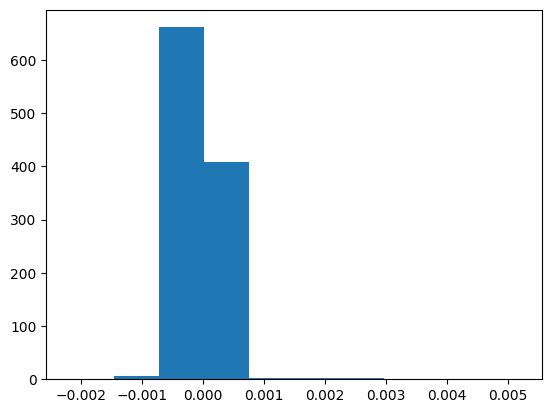

In [ ]:
from matplotlib import pyplot as plt
np.histogram(res_train_1000)
plt.hist(res_train_1000,bins=10)

In [ ]:
nm = "ngb"
D_model = {nm:{oos:{}}}

In [ ]:
import pickle as pkl

In [ ]:
import pickle as pkl
from pathlib import Path
for oos in [250,500,750,1000]:
  file_path = 'ngb_model_%d.p'%oos

  with open(file_path,"wb") as f:
      pkl.dump(D_models[oos]["model_ngb"], f)

In [ ]:
for oos in 250,500,750,1000:
  df_test = dfN[-oos:]
  model_ngb_t = pkl.load(open('ngb_model_%d.p'%oos,"rb"))
  df_test["ngb_pred"] = model_ngb_t.predict(df_test.fillna(0.0))#X_train[:].fillna(0.0)) #  Y_preds#.fillna(0.0)
  trading_ngb = df_test.apply(lambda r: 1 if r["ngb_pred"] > 0. else -1, axis=1)
  trades_ngb = pd.DataFrame({
      'A': df_test['IVV_return'].shift(-1),
      'B': df_test['IWB_return'].shift(-1),
      'target': trading_ngb#y_test
  })
  ngb_strategy = trades_ngb['A'].fillna(0.0) * trading_ngb.fillna(0.0)- trades_ngb['B'].fillna(0.0) * trading_ngb.fillna(0.0)
  #nm = "ngb"
  D_model[nm][oos] = {}
  for key in metrics_dict.keys():
    print("*"*40)
    D_model[nm][oos][key] = metrics_dict[key](ngb_strategy)
    print(f' {key}: {D_model[nm][oos][key]:.4f}')


<ipython-input-50-c1ff5972f794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["ngb_pred"] = model_ngb_t.predict(df_test.fillna(0.0))#X_train[:].fillna(0.0)) #  Y_preds#.fillna(0.0)


****************************************
 sharpe_ratio: 0.5776
****************************************
 total_return: 0.0077
****************************************
prices.shape  (250,)
Maximum drawdown: 0.69%
Maximum drawdown duration: 243 days
 drawdown: 0.0069


<ipython-input-50-c1ff5972f794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["ngb_pred"] = model_ngb_t.predict(df_test.fillna(0.0))#X_train[:].fillna(0.0)) #  Y_preds#.fillna(0.0)
<ipython-input-50-c1ff5972f794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["ngb_pred"] = model_ngb_t.predict(df_test.fillna(0.0))#X_train[:].fillna(0.0)) #  Y_preds#.fillna(0.0)


****************************************
 sharpe_ratio: 2.0944
****************************************
 total_return: 0.0571
****************************************
prices.shape  (500,)
Maximum drawdown: 0.72%
Maximum drawdown duration: 119 days
 drawdown: 0.0072
****************************************
 sharpe_ratio: 0.3130
****************************************
 total_return: 0.0135
****************************************
prices.shape  (750,)
Maximum drawdown: 3.61%
Maximum drawdown duration: 425 days
 drawdown: 0.0361
****************************************
 sharpe_ratio: 0.7407
****************************************
 total_return: 0.0425
****************************************
prices.shape  (1000,)
Maximum drawdown: 2.06%
Maximum drawdown duration: 450 days
 drawdown: 0.0206


<ipython-input-50-c1ff5972f794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["ngb_pred"] = model_ngb_t.predict(df_test.fillna(0.0))#X_train[:].fillna(0.0)) #  Y_preds#.fillna(0.0)


In [ ]:
D_model

{'ngb': {1000: {'sharpe_ratio': 0.7406713172322725,
   'total_return': 0.04253430038464279,
   'drawdown': 0.020561674322802093},
  250: {'sharpe_ratio': 0.577565018816964,
   'total_return': 0.007732100496796623,
   'drawdown': 0.006917453004370633},
  500: {'sharpe_ratio': 2.0944077159943624,
   'total_return': 0.05706160944433092,
   'drawdown': 0.0071973371363814875},
  750: {'sharpe_ratio': 0.31303886759454747,
   'total_return': 0.013535004562077346,
   'drawdown': 0.03609456114238996}}}

In [ ]:
import pandas as pd

D = {
    'A': {
        1: {'a': 2, 'b': 3},
        2: {'a': 8, 'b': 1}
    },
    'B': {
        1: {'a': 7, 'b': 1},
        2: {'a': 9, 'b': 1}
    }
}
def flatten(D):
  # Flatten the nested dictionary
  flattened_dict = []
  for key1, nested_dict in D.items():
      for key2, inner_dict in nested_dict.items():
          for key3, value in inner_dict.items():
              flattened_dict.append({'Key1': key1, 'Key2': key2, 'Key3': key3, 'Value': value})

  # Convert the flattened list of dictionaries to a DataFrame
  return pd.DataFrame(flattened_dict)

print(flatten(D))

print(flatten(D_model))


  Key1  Key2 Key3  Value
0    A     1    a      2
1    A     1    b      3
2    A     2    a      8
3    A     2    b      1
4    B     1    a      7
5    B     1    b      1
6    B     2    a      9
7    B     2    b      1
   Key1  Key2          Key3     Value
0   ngb  1000  sharpe_ratio  0.740671
1   ngb  1000  total_return  0.042534
2   ngb  1000      drawdown  0.020562
3   ngb   250  sharpe_ratio  0.577565
4   ngb   250  total_return  0.007732
5   ngb   250      drawdown  0.006917
6   ngb   500  sharpe_ratio  2.094408
7   ngb   500  total_return  0.057062
8   ngb   500      drawdown  0.007197
9   ngb   750  sharpe_ratio  0.313039
10  ngb   750  total_return  0.013535
11  ngb   750      drawdown  0.036095


In [ ]:
df_test[trading_ngb.isna()].index , df_test[trades_ngb['B'].isna()].index, df_test[trades_ngb['A'].isna()].index

(Index([], dtype='object', name='Date'),
 Index(['2021-12-30', '2023-04-18'], dtype='object', name='Date'),
 Index(['2023-04-18'], dtype='object', name='Date'))

In [ ]:

D_model["S&P500-Russell1000"] = {}

In [ ]:
tradesN = pd.DataFrame({
    'A': df['IVV_return'],
    'B': df['IWB_return'],
})
returns_strategy3 = tradesN['A'] - tradesN['B'].fillna(0.0)
#returns_strategy3 = returns_strategy3.fillna(0.0)[-250:]
for oos in [250,500,750,1000]:
  D_model["S&P500-Russell1000"][oos] = {}
  for key in metrics_dict.keys():
    print("*"*40)

    D_model["S&P500-Russell1000"][oos][key] = metrics_dict[key](returns_strategy3[-oos:])
    print(f' {key}: {D_model["S&P500-Russell1000"][oos][key]}:.2f')
  print("-"*40)


****************************************
 sharpe_ratio: 0.5394473391621009:.2f
****************************************
 total_return: 0.007227129249229747:.2f
****************************************
prices.shape  (250,)
Maximum drawdown: 0.77%
Maximum drawdown duration: 102 days
 drawdown: 0.007653461003438999:.2f
----------------------------------------
****************************************
 sharpe_ratio: 1.0444794115549663:.2f
****************************************
 total_return: 0.028650706705671714:.2f
****************************************
prices.shape  (500,)
Maximum drawdown: 0.77%
Maximum drawdown duration: 352 days
 drawdown: 0.007653461003438999:.2f
----------------------------------------
****************************************
 sharpe_ratio: 0.03713116437023475:.2f
****************************************
 total_return: 0.0016059950017456304:.2f
****************************************
prices.shape  (750,)
Maximum drawdown: 3.51%
Maximum drawdown duration: 201 day

<Axes: xlabel='Date'>

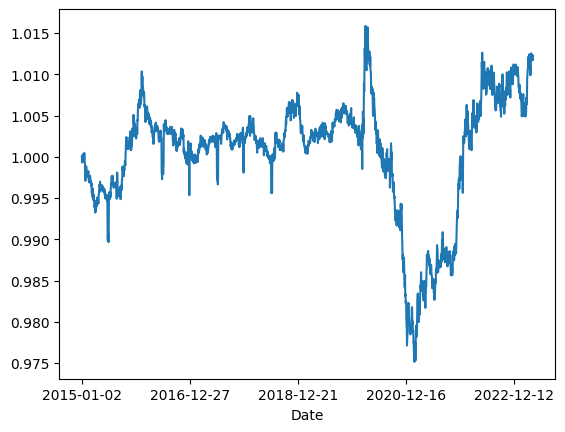

In [ ]:
(1.+returns_strategy3).cumprod().plot()

Revert to the mean?

In [ ]:
df["mean_revert"] =  (df['IVV_return'] > df['IWB_return']).shift(1).fillna(0.0)
trading_mean_reverting = df.apply(lambda r: -1 if r["mean_revert"] > 0.5 else 1, axis=1)


In [ ]:
returns_strategy_mr = tradesN['A'] * trading_mean_reverting - tradesN['B'] * trading_mean_reverting

In [ ]:
D_model["mean_revert"] = {}

In [ ]:
for oos in [250,500,750,1000]:
  D_model["mean_revert"][oos] = {}
  for key in metrics_dict.keys():
    print("*"*40)

    D_model["mean_revert"][oos][key] = metrics_dict[key](returns_strategy_mr[-oos:].fillna(0.0)[1:-1])
    print(f' {key}: {D_model["mean_revert"][oos][key]}:.2f')
  print("-"*40)

****************************************
 sharpe_ratio: 0.5903669707993302:.2f
****************************************
 total_return: 0.007864678039611994:.2f
****************************************
prices.shape  (248,)
Maximum drawdown: 0.70%
Maximum drawdown duration: 74 days
 drawdown: 0.006982713646692007:.2f
----------------------------------------
****************************************
 sharpe_ratio: 0.890016112928391:.2f
****************************************
 total_return: 0.024161716137272138:.2f
****************************************
prices.shape  (498,)
Maximum drawdown: 1.15%
Maximum drawdown duration: 287 days
 drawdown: 0.01151237113891479:.2f
----------------------------------------
****************************************
 sharpe_ratio: 0.9833372313242413:.2f
****************************************
 total_return: 0.04216668109675037:.2f
****************************************
prices.shape  (748,)
Maximum drawdown: 1.15%
Maximum drawdown duration: 537 days
 dra

In [ ]:
D_model

{'ngb': {1000: {'sharpe_ratio': 0.7406713172322725,
   'total_return': 0.04253430038464279,
   'drawdown': 0.020561674322802093},
  250: {'sharpe_ratio': 0.577565018816964,
   'total_return': 0.007732100496796623,
   'drawdown': 0.006917453004370633},
  500: {'sharpe_ratio': 2.0944077159943624,
   'total_return': 0.05706160944433092,
   'drawdown': 0.0071973371363814875},
  750: {'sharpe_ratio': 0.31303886759454747,
   'total_return': 0.013535004562077346,
   'drawdown': 0.03609456114238996}},
 'S&P500-Russell1000': {250: {'sharpe_ratio': 0.5394473391621009,
   'total_return': 0.007227129249229747,
   'drawdown': 0.007653461003438999},
  500: {'sharpe_ratio': 1.0444794115549663,
   'total_return': 0.028650706705671714,
   'drawdown': 0.007653461003438999},
  750: {'sharpe_ratio': 0.03713116437023475,
   'total_return': 0.0016059950017456304,
   'drawdown': 0.03507203586648455},
  1000: {'sharpe_ratio': 0.16695962663790592,
   'total_return': 0.009598994983030629,
   'drawdown': 0.04080

In [ ]:
compare = flatten(D_model)
compare = compare.rename(columns = {"Key1":"model_name","Key2":"out of sample length","Key3": "metric"})
compare.to_csv("compare_simple_methods.csv",index=False)

In [ ]:
compare.sort_values(by=["out of sample length","metric"])

,model_name,out of sample length,metric,Value
5,ngb,250,drawdown,0.006917
14,S&P500-Russell1000,250,drawdown,0.007653
26,mean_revert,250,drawdown,0.006983
3,ngb,250,sharpe_ratio,0.577565
12,S&P500-Russell1000,250,sharpe_ratio,0.539447
24,mean_revert,250,sharpe_ratio,0.590367
4,ngb,250,total_return,0.007732
13,S&P500-Russell1000,250,total_return,0.007227
25,mean_revert,250,total_return,0.007865
8,ngb,500,drawdown,0.007197


<Axes: xlabel='Date'>

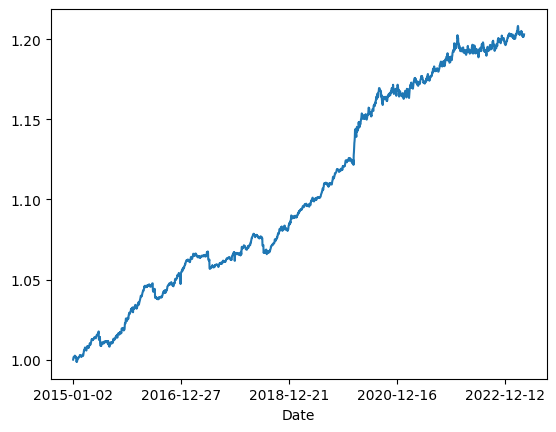

In [ ]:
(1.+returns_strategy_mr.fillna(0.0)).cumprod().plot()

In [ ]:
for key in metrics_dict.keys():
  print("*"*40)
  print(f' {key}: {metrics_dict[key](returns_strategy_mr.fillna(0.0)[-500:-1]):.2f}')
print("-"*40)


****************************************
 sharpe_ratio: 0.87
****************************************
 total_return: 0.02
****************************************
prices.shape  (499,)
Maximum drawdown: 1.15%
Maximum drawdown duration: 288 days
 drawdown: 0.01
----------------------------------------


In [ ]:
for key in metrics_dict.keys():
  print("*"*40)
  print(f' {key}: {metrics_dict[key](ngb_strategy):.4f}')

****************************************
 sharpe_ratio: 0.7407
****************************************
 total_return: 0.0425
****************************************
prices.shape  (1000,)
Maximum drawdown: 2.06%
Maximum drawdown duration: 450 days
 drawdown: 0.0206


<Axes: xlabel='Date'>

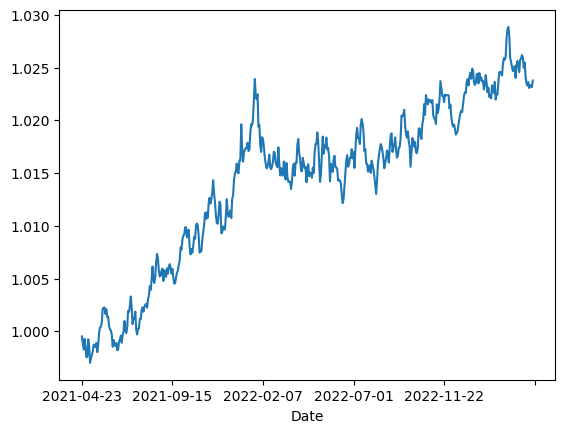

In [ ]:
(1.+returns_strategy_mr.fillna(0.0)[-500:-1]).cumprod().plot()

In [ ]:
dumb_strategy =  (df['IVV_return'] - df['IWB_return']).shift(1).fillna(0.0)[-750:]

for key in metrics_dict.keys():
  print("*"*40)
  print(f' {key}: {metrics_dict[key](dumb_strategy):.4f}')


****************************************
 sharpe_ratio: 0.1054
****************************************
 total_return: 0.0045
****************************************
prices.shape  (750,)
Maximum drawdown: 3.55%
Maximum drawdown duration: 202 days
 drawdown: 0.0355


In [ ]:
D_models[250]["model_ngb"].predict(X_test[-30:-25])

array([ 1.45513442e-04, -7.48287067e-05, -9.31664977e-05,  9.89088863e-05,
       -2.05611897e-04])

In [ ]:
X_test[:-25].tail()

,IVV_Open,IVV_High,IVV_Low,IVV_Close,IVV_Adjusted_close,IVV_Volume,IVV_CashVolume,IVV_return,IVV_monthly_return,IVV_weekly_return,...,IWB_rank CashVolume,IWB_rank CashVolume_22,IWB_rank CashVolume_5,IWB_MA_CashVolume_5_TO_MA_CashVolume_22,IVV_ret_GT_IWB_ret,IVV_weekly_ret_GT_IWB_weekly_ret,IVV_monthly_ret_GT_IWB_monthly_ret,IVV_ret_min_IWB_ret,IVV_weekly_ret_min_IWB_weekly_ret,IVV_monthly_ret_min_IWB_monthly_ret
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-07,406.34,406.5800,399.49,400.13,398.4627,3536209,1.414943e+09,-0.015767,-0.044260,0.005428,...,5052.0,4302.0,4486.0,1.057623,False,True,True,-0.000814,0.001458,0.001413
2023-03-08,400.30,401.5899,398.44,400.83,399.1598,3423540,1.372258e+09,0.001749,-0.032629,0.010793,...,4267.0,4285.0,4366.0,1.015881,True,True,True,0.000250,0.001125,0.001262
2023-03-09,401.63,403.3300,392.32,393.41,391.7707,3578709,1.407900e+09,-0.018512,-0.044658,-0.015663,...,3899.0,4201.0,4239.0,0.999740,True,True,True,0.000731,0.001706,0.001130
2023-03-10,392.85,394.9450,386.11,387.88,386.2638,6751220,2.618663e+09,-0.014057,-0.070100,-0.044819,...,5177.0,4336.0,4682.0,1.130946,True,True,True,0.002093,0.003861,0.003250
2023-03-13,383.50,392.0500,382.37,387.07,385.4572,5579127,2.159513e+09,-0.002088,-0.061808,-0.047892,...,4346.0,4379.0,4690.0,1.118813,True,True,True,0.000451,0.002609,0.004001


In [ ]:
X_test.loc['2023-04-13']

IVV_Open                                              411.04
IVV_High                                              415.62
IVV_Low                                                410.5
IVV_Close                                             415.27
IVV_Adjusted_close                                    415.27
IVV_Volume                                           3570000
IVV_CashVolume                                  1482513900.0
IVV_return                                          0.013027
IVV_monthly_return                                  0.072855
IVV_weekly_return                                   0.014189
IVV_Mean_Close_5                                     411.832
IVV_MA_CashVolume_22                       1873207944.337727
IVV_MA_CashVolume_5                             1395236621.4
IVV_rank CashVolume                                   5006.0
IVV_rank CashVolume_22                                5345.0
IVV_rank CashVolume_5                                 4924.0
IVV_MA_CashVolume_5_TO_M

In [ ]:
D_models[250]["model_ngb"].predict(np.array(X_test.loc['2023-04-13']).reshape(1, -1))[0]

-0.00012203552334499807

In [ ]:
X_test_2 = X_test[:"2023-04-15"]

In [ ]:
X_test_2.index.values[-1]

'2023-04-14'

In [ ]:
def predict_last_value_date(data,model):
  dt = data.index.values[-1]
  prediction = model.predict(np.array(X_test.loc[dt]).reshape(1, -1))[0]
  return dt, prediction

In [ ]:
predict_last_value_date(X_test_2,D_models[250]["model_ngb"])

('2023-04-14', 8.021880162711413e-05)

In [ ]:
def basic_decision_method(x):
  print(x)
  if x >0:
    return 1
  else:
    return -1


In [ ]:
def predict_by_date(data,dt,model):
  return model.predict(np.array(data.loc[dt]).reshape(1, -1))[0]

def trading_decision_by_date(data,dt,model,decision_method):
  val = predict_by_date(data,dt,model)
  return decision_method(val),val
def trading_decision_last_date(data,model,decision_method):
  dt,val = predict_last_value_date(data,model)
  return dt,decision_method(val),val




In [ ]:
trading_decision_last_date(X_test_2,D_models[250]["model_ngb"],basic_decision_method)


8.021880162711413e-05


('2023-04-14', 1, 8.021880162711413e-05)

In [ ]:
df.shape

(2087, 41)

In [ ]:
df.tail()

,IVV_Open,IVV_High,IVV_Low,IVV_Close,IVV_Adjusted_close,IVV_Volume,IVV_CashVolume,IVV_return,IVV_monthly_return,IVV_weekly_return,...,IWB_rank CashVolume_22,IWB_rank CashVolume_5,IWB_MA_CashVolume_5_TO_MA_CashVolume_22,IVV_ret_GT_IWB_ret,IVV_weekly_ret_GT_IWB_weekly_ret,IVV_monthly_ret_GT_IWB_monthly_ret,IVV_ret_min_IWB_ret,IVV_weekly_ret_min_IWB_weekly_ret,IVV_monthly_ret_min_IWB_monthly_ret,mean_revert
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-12,413.68,413.94,409.23,409.93,409.93,3959000,1.622913e+09,-0.003743,0.056847,-0.001218,...,4650.0,3220.0,0.577642,True,True,True,2.564326e-04,0.000252,0.002619,False
2023-04-13,411.04,415.62,410.50,415.27,415.27,3570000,1.482514e+09,0.013027,0.072855,0.014189,...,4642.0,3212.0,0.578227,False,False,True,-3.765543e-07,-0.000422,0.002174,True
2023-04-14,414.64,416.89,411.85,414.25,414.25,3546700,1.469220e+09,-0.002456,0.052518,0.007883,...,4409.0,3362.0,0.664636,False,False,True,-1.661906e-04,-0.000799,0.001534,False
2023-04-17,414.14,415.85,412.88,415.78,415.78,2482500,1.032174e+09,0.003693,0.062941,0.010450,...,4470.0,4015.0,0.838119,True,True,True,6.035962e-04,0.000136,0.001769,False
2023-04-18,417.44,417.52,414.60,416.02,416.02,2652500,1.103493e+09,0.000577,0.045565,0.011058,...,4339.0,4245.0,0.961054,False,True,True,-5.668861e-04,0.000127,0.001223,True
